<a href="https://colab.research.google.com/github/Luffy293/project/blob/main/Mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring path of kaggle.jason file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# extracting the Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls #to list number of directories we have

 data			'mask myths.for project.jpg'	      sample_data
 face-mask-dataset.zip	'not wearing mask for project.jpeg'
 kaggle.json		'Rachel for project.jpg'


In [ ]:
import os #to access the files
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 #use for image processing
from google.colab.patches import cv2_imshow #cv2 has a func called cv_2imshow which shows the images in a new window..its not possible in colab so to use it we use this comand
from PIL import Image #another image processing library
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask') #showing all images with mask
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1140.jpg', 'with_mask_1832.jpg', 'with_mask_1.jpg', 'with_mask_3250.jpg', 'with_mask_3308.jpg']
['with_mask_1262.jpg', 'with_mask_3485.jpg', 'with_mask_493.jpg', 'with_mask_621.jpg', 'with_mask_56.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2600.jpg', 'without_mask_247.jpg', 'without_mask_2508.jpg', 'without_mask_1126.jpg', 'without_mask_1356.jpg']
['without_mask_579.jpg', 'without_mask_980.jpg', 'without_mask_2351.jpg', 'without_mask_357.jpg', 'without_mask_2801.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [ ]:
#Creating lables for two class
#withmask-0
#without mask- 1
with_mask_labels = [0]*3725
without_mask_labels = [1]*3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


In [ ]:
#combining two list
labels = with_mask_labels + without_mask_labels
print(len(labels))

7553


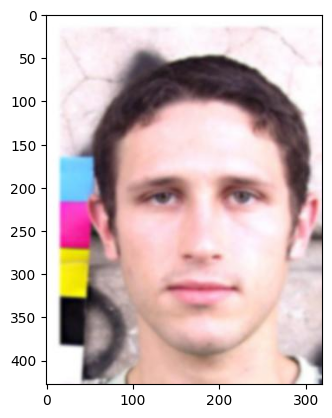

In [ ]:
import random
# Generate a random index within the range of the list
random_index = random.randint(0, len(without_mask_files) - 1)
# Get the random image file name using the index
random_image_file = without_mask_files[random_index]
# Construct the full path to the image
image_path = '/content/data/without_mask/' + random_image_file
# Read and display the image
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()

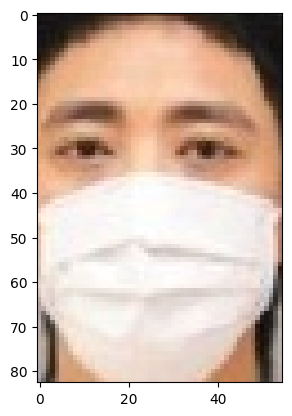

In [ ]:
random_index = random.randint(0, len(with_mask_files) - 1)
random_image_file = with_mask_files[random_index]
image_path = '/content/data/with_mask/' + random_image_file
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()

In [ ]:
#Image processing
#Resize the Images
# convert images to numpy arrays+
with_mask_path = '/content/data/with_mask/'
data = [] # empty list created
for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'
for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB') #changing black and white images into color images
  image = np.array(image) # converting images into numpy array
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[ 48,  48,  58],
        [ 49,  49,  59],
        [ 49,  49,  59],
        ...,
        [ 90,  92, 104],
        [ 92,  94, 106],
        [103, 105, 117]],

       [[ 48,  48,  58],
        [ 49,  49,  59],
        [ 50,  50,  60],
        ...,
        [ 90,  93, 102],
        [ 93,  97, 105],
        [101, 104, 113]],

       [[ 47,  50,  59],
        [ 47,  50,  59],
        [ 49,  50,  60],
        ...,
        [ 89,  93,  98],
        [ 93,  99, 105],
        [ 98, 104, 109]],

       ...,

       [[ 33,  36,  45],
        [ 33,  36,  45],
        [ 33,  36,  45],
        ...,
        [ 92, 101, 131],
        [ 82,  90, 119],
        [ 72,  79, 106]],

       [[ 34,  37,  46],
        [ 34,  37,  46],
        [ 33,  36,  45],
        ...,
        [ 80,  89, 120],
        [ 72,  80, 109],
        [ 60,  67,  92]],

       [[ 33,  36,  45],
        [ 33,  36,  45],
        [ 33,  36,  45],
        ...,
        [ 74,  83, 112],
        [ 55,  65,  91],
        [ 47,  55,  78]]], dtype=uint8)
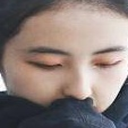

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[0 0 0 ... 1 1 1]


In [ ]:
#Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

array([[[110, 115, 111],
        [167, 172, 168],
        [184, 189, 185],
        ...,
        [218, 220, 215],
        [219, 221, 216],
        [218, 220, 215]],

       [[134, 139, 135],
        [ 92,  97,  93],
        [148, 153, 149],
        ...,
        [219, 221, 216],
        [221, 223, 218],
        [220, 222, 217]],

       [[215, 220, 216],
        [172, 177, 173],
        [107, 112, 108],
        ...,
        [219, 221, 216],
        [220, 222, 217],
        [219, 221, 216]],

       ...,

       [[194, 179, 176],
        [200, 185, 182],
        [189, 174, 171],
        ...,
        [143, 139, 128],
        [163, 159, 147],
        [189, 185, 174]],

       [[191, 176, 173],
        [192, 177, 174],
        [197, 182, 179],
        ...,
        [136, 132, 121],
        [148, 144, 132],
        [186, 182, 171]],

       [[192, 179, 175],
        [186, 172, 169],
        [184, 171, 168],
        ...,
        [143, 139, 129],
        [151, 147, 137],
        [178, 174, 163]]], dtype=uint8)
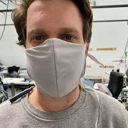

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.43137255, 0.45098039, 0.43529412],
        [0.65490196, 0.6745098 , 0.65882353],
        [0.72156863, 0.74117647, 0.7254902 ],
        ...,
        [0.85490196, 0.8627451 , 0.84313725],
        [0.85882353, 0.86666667, 0.84705882],
        [0.85490196, 0.8627451 , 0.84313725]],

       [[0.5254902 , 0.54509804, 0.52941176],
        [0.36078431, 0.38039216, 0.36470588],
        [0.58039216, 0.6       , 0.58431373],
        ...,
        [0.85882353, 0.86666667, 0.84705882],
        [0.86666667, 0.8745098 , 0.85490196],
        [0.8627451 , 0.87058824, 0.85098039]],

       [[0.84313725, 0.8627451 , 0.84705882],
        [0.6745098 , 0.69411765, 0.67843137],
        [0.41960784, 0.43921569, 0.42352941],
        ...,
        [0.85882353, 0.86666667, 0.84705882],
        [0.8627451 , 0.87058824, 0.85098039],
        [0.85882353, 0.86666667, 0.84705882]],

       ...,

       [[0.76078431, 0.70196078, 0.69019608],
        [0.78431373, 0.7254902 , 0.71372549],
        [0.74117647, 0

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')  # Single output for binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Changed from sparse_categorical_crossentropy
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=3)

Epoch 1/3
170/170 ━━━━━━━━━━━━━━━━━━━━ 155s 912ms/step - accuracy: 0.7381 - loss: 0.4901 - val_accuracy: 0.8612 - val_loss: 0.2875
Epoch 2/3
170/170 ━━━━━━━━━━━━━━━━━━━━ 203s 919ms/step - accuracy: 0.9019 - loss: 0.2469 - val_accuracy: 0.8992 - val_loss: 0.2360
Epoch 3/3
170/170 ━━━━━━━━━━━━━━━━━━━━ 198s 899ms/step - accuracy: 0.9189 - loss: 0.1961 - val_accuracy: 0.9273 - val_loss: 0.1938


In [ ]:
#Model Evaluation
loss, accuracy = model.evaluate(X_test_scaled, Y_test) # Now 'model' is defined and accessible
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 17s 355ms/step - accuracy: 0.9281 - loss: 0.2029
Test Accuracy = 0.9232296347618103


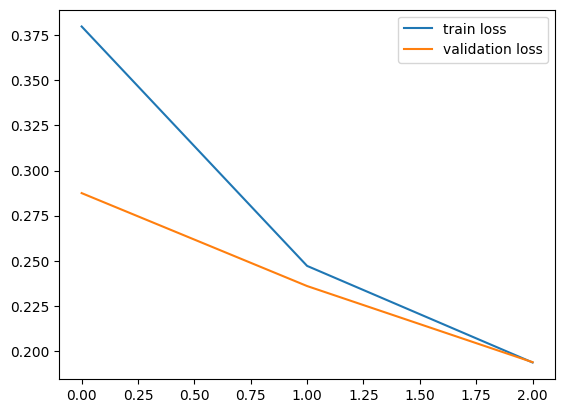

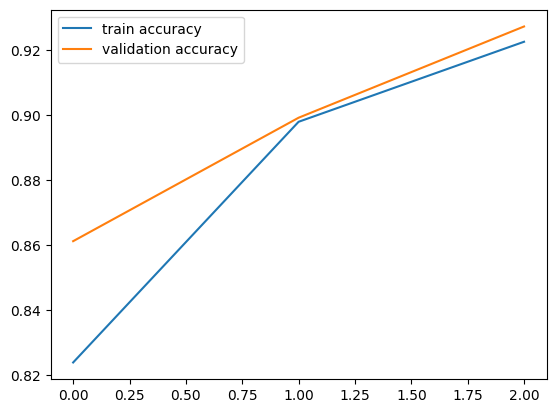

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
def predict_mask(image_path):
    input_image = cv2.imread(image_path)
    input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)  # Fix color channels

    plt.imshow(input_image)
    plt.axis('off')

    input_image_resized = cv2.resize(input_image, (128,128))
    input_image_scaled = input_image_resized/255.0
    input_image_reshaped = np.expand_dims(input_image_scaled, axis=0)

    prediction = model.predict(input_image_reshaped)[0][0]  # Get single probability

    threshold = 0.5
    if prediction >= threshold:
        plt.title(f"No Mask ({prediction*100:.2f}% confidence)", color='red')
    else:
        plt.title(f"Mask Detected ({(1-prediction)*100:.2f}% confidence)", color='green')
    plt.show()

Path of the image: /content/mask1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Mask Detected


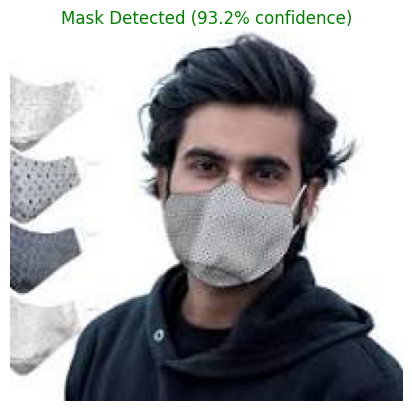

In [ ]:
input_image_path = input('Path of the image: ')
input_image = cv2.imread(input_image_path)
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

plt.imshow(input_image)
plt.axis('off')

input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.expand_dims(input_image_scaled, axis=0)

prediction = model.predict(input_image_reshaped)[0][0]

if prediction < 0.5:  # CORRECTED CONDITION
    plt.title(f"Mask Detected ({(1-prediction)*100:.1f}% confidence)", color='green')
    print('Mask Detected')
else:
    plt.title(f"No Mask ({prediction*100:.1f}% confidence)", color='red')
    print('No Mask Detected')

plt.show()